In [1]:
from get_data import get_data
from strategies import lump_buy, cost_average
import seaborn as sns
import matplotlib.pyplot as plt

## Initial comparison of strategies

In [2]:
to_invest = 10_000
duration = 365*10 # days
frequency = 7 # days

ticker = "AAPL"

start = "02/06/2012"
end = "02/06/2022"

fractional = True

data = get_data(ticker, date_from=start, date_to=end, granularity="day", save=False)

Filtering existing data...


In [3]:
lump = lump_buy(data,start,end,value=to_invest, fractional_stocks=fractional)
lump.tail()

,index,date,current_total_value,cum_cost,cum_quantity
2512,2512,2012-06-08,10233.832031,10000.0,497.512476
2513,2513,2012-06-07,10208.956055,10000.0,497.512476
2514,2514,2012-06-06,10121.891602,10000.0,497.512476
2515,2515,2012-06-05,9987.563477,10000.0,497.512476
2516,2516,2012-06-04,10000.000000,10000.0,497.512476


In [4]:
ca = cost_average(data,start,end,frequency,value=to_invest/duration, fractional_stocks=fractional)
ca.tail()

,date,cost,quantity,buy_cost,cum_quantity,cum_cost,current_total_value
515,2022-05-03,158.815002,0.017251,2.739726,41.466998,1413.698630,6585.581336
516,2022-05-10,155.014999,0.017674,2.739726,41.484672,1416.438356,6430.746344
517,2022-05-17,149.050003,0.018381,2.739726,41.503053,1419.178082,6186.030156
518,2022-05-24,140.584991,0.019488,2.739726,41.522541,1421.917808,5837.446058
519,2022-06-02,149.169998,<NA>,<NA>,41.522541,1421.917808,6193.917350


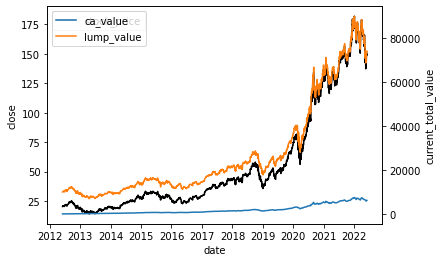

In [5]:
# Plot stock price
ax1 = sns.lineplot(x=data["date"],y=data["close"],color="black")
ax1.legend(labels=["stock_price"])

# Plot cost-avg and lump on second y-axis
ax2 = plt.twinx()
sns.lineplot(x=ca["date"],y=ca["current_total_value"],ax=ax2)
# sns.lineplot(x=ca["date"],y=ca["cum_cost"],ax=ax)
sns.lineplot(x=lump["date"],y=lump["current_total_value"],ax=ax2)


ax2.legend(labels=["ca_value","lump_value"])